<a href="https://colab.research.google.com/github/Inyrkz/PneumoniaX/blob/master/PneumoniaX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=74b272da9dad3d7c388663da4b7ad7341d36852dca7600cee6ff922b9ddd7c9d
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 157.8 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [ ]:
!kill -9 -1

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "inyrkz" # username from the json file
os.environ['KAGGLE_KEY'] = "ed79289c859ef6fd86f9fa1bdcc8e710" # key from the json file
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia # api copied from kaggle

100% 2.29G/2.29G [00:29<00:00, 86.8MB/s]
100% 2.29G/2.29G [00:29<00:00, 83.0MB/s]


In [ ]:
!ls

chest-xray-pneumonia.zip  happy-house-dataset.zip  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#!unzip -uq "/content/drive/My Drive/Mydataset/chest-xray-pneumonia.zip" -d "/content/drive/My Drive/Mydataset"

In [ ]:
# Importing the Keras libraries and packages
import glob
import imageio as im
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Convolution2D  #add convolutional layer for images
from keras.layers import MaxPooling2D  # add pooling layer to network
from keras.layers import Flatten  # convert all the pooled feature maps created
from keras.layers import Dropout  # reduces overfitting
from keras.layers import Reshape
from keras.preprocessing import image
# for convolution and pooling layer in a large feature vector that is fed in as input to the fully connected layer.
from keras.layers import Dense #used to add the fully connected layer in a neural network

Using TensorFlow backend.


In [ ]:
#Initialising the CNN model
classifier = Sequential()

In [ ]:
#classifier.add(Reshape((200, 200, 3))) #reshaping the input data before adding the conv layer
#Step 1 & 2 - Convolution and MaxPooling
classifier.add(Convolution2D(32, 3, 3, input_shape=(200, 200, 3), activation='relu'))# 3 is the number of channels; using tensorflow backend
classifier.add(MaxPooling2D(pool_size=(2,2))) 

#Adding another convolutinal layer
classifier.add(Convolution2D(64, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Adding another convolutinal layer
classifier.add(Convolution2D(128, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Adding another convolutinal layer
classifier.add(Convolution2D(128, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step 3 - Flattening
classifier.add(Flatten()) 
classifier.add(Dropout(0.5)) #reduce overfitting

#Step 4 - Full connection
classifier.add(Dense(output_dim=512, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [ ]:
#Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
#Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
train_dir = '/content/drive/My Drive/Mydataset/chest_xray/train'
val_dir = '/content/drive/My Drive/Mydataset/chest_xray/val'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)  # image augementation

test_datagen = ImageDataGenerator(rescale=1./255)  # preprocessing test set images

training_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='binary') # two classes

validation_set = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='binary')

Found 3798 images belonging to 2 classes.
Found 2058 images belonging to 2 classes.


In [ ]:
ntrain = 3798 #no of training images
nval = 2058 #no of val images

In [ ]:
# #normal images plotting
# images = []
# for img_path in glob.glob('/content/drive/My Drive/Mydataset/chest_xray/train/NORMAL/*.jpeg'):
#     images.append(mpimg.imread(img_path))

# plt.figure(figsize=(20,10))
# columns = 5
# for i, image in enumerate(images):
#     plt.subplot(len(images) / columns + 1, columns, i + 1)
#     plt.imshow(image[5])

In [ ]:
# #pneumonia images plotting
# images2 = []
# for img_path in glob.glob('/content/drive/My Drive/Mydataset/chest_xray/train/PNEUMONIA/*.jpeg'):
#     images2.append(mpimg.imread(img_path))

# plt.figure(figsize=(20,10))
# columns = 5
# for i, image in enumerate(images2):
#     plt.subplot(len(images2) / columns + 1, columns, i + 1)
#     plt.imshow(image2)

In [ ]:
import os
import random
pneumonia = ['/content/drive/My Drive/Mydataset/chest_xray/train/PNEUMONIA/{}'.format(i) for i in os.listdir('/content/drive/My Drive/Mydataset/chest_xray/train/PNEUMONIA') if 'person' in i]
no_pneumonia =  ['/content/drive/My Drive/Mydataset/chest_xray/train/NORMAL/{}'.format(i) for i in os.listdir('/content/drive/My Drive/Mydataset/chest_xray/train/NORMAL') if 'IM' in i]
random.shuffle(pneumonia) #randomly shuffle pneumonia images
random.shuffle(no_pneumonia) #randomly shuffle other pneumonia free images
train_imgs = pneumonia + no_pneumonia
#creating a list of pneumonia and pneumonia free images
#train_set directory for display and shuffling the list

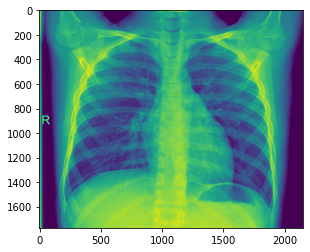

Normal


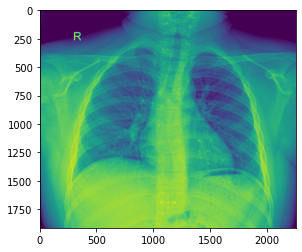

Normal


In [ ]:
for i in no_pneumonia[0:2]:
  img = mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.show()
  print('Normal')

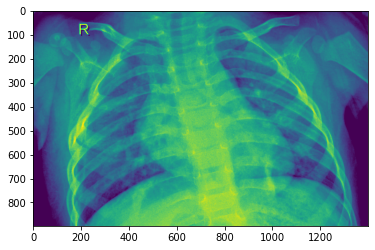

Pneumonia


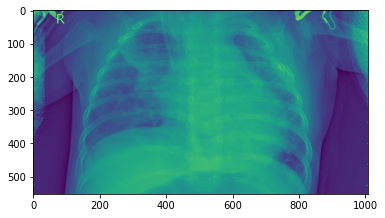

Pneumonia


In [ ]:
#plot images with pneumonia
for i in pneumonia[0:2]:
  img = mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.show()
  print('Pneumonia')

In [ ]:
# we will use ModelCheckpoint to store the weights of the best performing epoch.
# We will specify val_acc as the metric to use to define the best model. 
# This means we will keep the weights of the epoch that scores highest in terms of accuracy on the test set.
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)


In [ ]:
history = classifier.fit_generator(
        training_set,
        steps_per_epoch=ntrain//batch_size, #no. of images in train images in each batch, ntrain//32 ('//'int value only)
        epochs=70,
        callbacks=[checkpointer], #get the weights of the epoch with the highest val acc
        validation_data=validation_set,
        validation_steps=nval//batch_size) #no. of images in test set per batch size

Epoch 1/70



118/118 [==============================] - 2688s 23s/step - loss: 0.5196 - acc: 0.7783 - val_loss: 0.6980 - val_acc: 0.6426

Epoch 00001: val_acc improved from -inf to 0.64258, saving model to best_weights.hdf5
Epoch 2/70
118/118 [==============================] - 95s 803ms/step - loss: 0.3905 - acc: 0.8133 - val_loss: 0.3632 - val_acc: 0.8500

Epoch 00002: val_acc improved from 0.64258 to 0.84995, saving model to best_weights.hdf5
Epoch 3/70
118/118 [==============================] - 93s 791ms/step - loss: 0.3308 - acc: 0.8519 - val_loss: 0.2836 - val_acc: 0.8766

Epoch 00003: val_acc improved from 0.84995 to 0.87660, saving model to best_weights.hdf5
Epoch 4/70
118/118 [==============================] - 93s 785ms/step - loss: 0.2871 - acc: 0.8763 - val_loss: 0.3309 - val_acc: 0.8445

Epoch 00004: val_acc did not improve from 0.87660
Epoch 5/70
118/118 [==============================] - 92s 784ms/step - loss: 0.2557 - acc: 0.8861 - val_loss: 0.5845 - val_acc: 0.7029

Epoch 00005: val_

In [ ]:
#We will make sure our classifier is loaded with the best weights with this
classifier.load_weights('best_weights.hdf5')

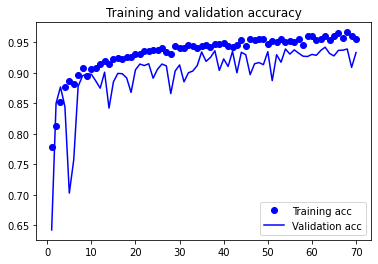

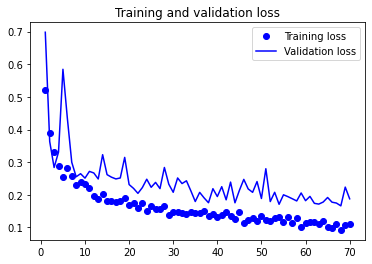

In [ ]:
#Displaying curves of loss and accuracy during training
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Using this is more preferable than the steps above
#There is no need to recompile when using this method
# save model and architecture to single file
classifier.save("pneumonia_model_new.h5") 


In [ ]:
# from keras.models import load_model
# import cv2
# import numpy as np
# img_path = '/content/drive/My Drive/Mydataset/chest_xray/val/NORMAL/IM-0005-0001.jpeg'
# img_path2 = '/content/drive/My Drive/Mydataset/chest_xray/val/PNEUMONIA/person107_virus_197.jpeg'
# img_path3 = '/content/drive/My Drive/Mydataset/chest_xray/val/NORMAL/IM-0005-0001.jpeg'
# img_path4 = '/content/drive/My Drive/Mydataset/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg'
# img_path5 = '/content/drive/My Drive/Mydataset/chest_xray/val/PNEUMONIA/person103_virus_190.jpeg'

# classifier = load_model('pneumonia_model_test.h5')

# classifier.compile(loss='categorical_crossentropy',
#                optimizer='adam',
#                metrics=['accuracy'])

# img = cv2.imread(img_path)
# img = cv2.resize(img,(200,200))
# img = np.reshape(img,[1,200,200,3])

# classes = classifier.predict_classes(img)

# print(classes)

[1]


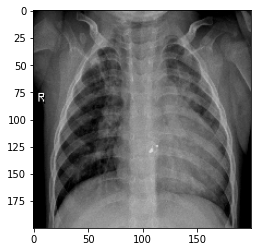

(1, 200, 200, 3)


In [ ]:
import numpy as np

#img_path = '/content/drive/My Drive/Mydataset/chest_xray/val/PNEUMONIA/person103_virus_190.jpeg'
img_path = '/content/drive/My Drive/Mydataset/chest_xray/val/NORMAL/IM-0005-0001.jpeg'
#img_path = '/content/drive/My Drive/Mydataset/chest_xray/val/NORMAL/IM-0005-0001.jpeg'
img_path2 = '/content/drive/My Drive/Mydataset/chest_xray/val/PNEUMONIA/person107_virus_197.jpeg'
img_path3 = '/content/drive/My Drive/Mydataset/chest_xray/val/NORMAL/IM-0005-0001.jpeg'
img_path4 = '/content/drive/My Drive/Mydataset/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg'
img_path5 = '/content/drive/My Drive/Mydataset/chest_xray/val/PNEUMONIA/person103_virus_190.jpeg'


img = image.load_img(img_path4, target_size=(200, 200) , color_mode='rgb')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=32)
print("Predicted class is:", classes)

Predicted class is: [[0]]
